In [1]:
import pandas as pd
import numpy as np
import pymysql
from numpy import * 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score,precision_score,f1_score

In [2]:
df=pd.read_csv('Group_8_data_cleaned.csv')#reading csv file using pandas
df.head()

,Unnamed: 0,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M,failure
0,0,298.1,308.6,1551,42.8,0,0,0,1,0
1,1,298.2,308.7,1408,46.3,3,0,1,0,0
2,2,298.1,308.5,1498,49.4,5,0,1,0,0
3,3,298.2,308.6,1433,39.5,7,0,1,0,0
4,4,298.2,308.7,1408,40.0,9,0,1,0,0


In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = df[[ "air_temp","process_temp","rot_speed","torque","tool_wear","Type_H","Type_L","Type_M"]]
y = df["failure"]

In [4]:
from sklearn.model_selection import train_test_split #splitting the data into training ,validation and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)#splitting data into training and testing 

X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.25, random_state=42)#splitting training data into traiing and validation data

<AxesSubplot:title={'center':'Class distribution before appying SMOTE'}, xlabel='failure'>

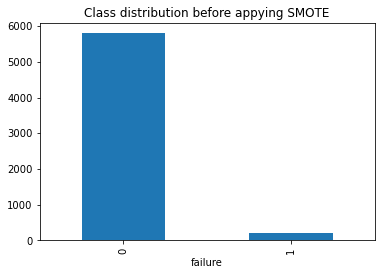

In [5]:
pd.Series(y_train1).value_counts().plot(kind='bar', title='Class distribution before appying SMOTE', xlabel='failure')

In [6]:
from imblearn.over_sampling import SMOTE, SMOTENC
#X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)
cat_indx =[0,1]
sm = SMOTENC(categorical_features=cat_indx, random_state=42)
X_train, y_train= sm.fit_resample(X_train1, y_train1)

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='failure'>

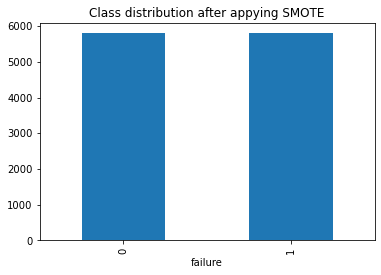

In [7]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='failure')


In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler().fit(X_train)
X_train_scaled2 = scaler.transform(X_train)

X_valid_scaled2= scaler.transform(X_valid)
X_test_scaled2 = scaler.transform(X_test)

In [9]:
classifiers = {'LogReg' : LogisticRegression(penalty= 'l2', class_weight= 'balanced'),
               'K-NN' : KNeighborsClassifier(weights= 'distance', p= 2, n_neighbors= 1),
               'DTree' : DecisionTreeClassifier(max_depth= 19, max_features= 'auto',min_samples_leaf= 2, min_samples_split= 2),
               'RF' : RandomForestClassifier(n_estimators= 46, min_samples_split= 2, min_samples_leaf= 2, max_features='sqrt',
                                             max_depth= 18),
               'SVM-Linear':SVC(kernel= 'linear', C= 0.01),
               'SVM-Non-Linear':SVC(kernel= 'poly', gamma= 0.1, degree= 2, C= 5.0)
              }

LogReg
 accuracy: 0.866
precision score: [0.98654971 0.15517241]
recall score: [0.87318841 0.66176471]
f1-score [0.92641406 0.25139665]


C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


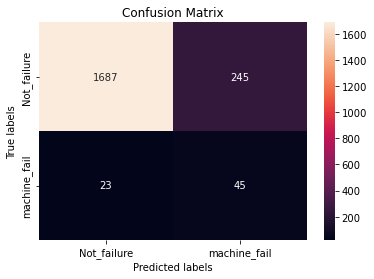

K-NN
 accuracy: 0.9095
precision score: [0.98557959 0.21319797]
recall score: [0.91977226 0.61764706]
f1-score [0.95153949 0.31698113]


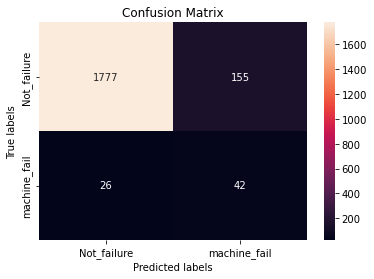

DTree
 accuracy: 0.9305
precision score: [0.98590786 0.27096774]
recall score: [0.94151139 0.61764706]
f1-score [0.96319831 0.37668161]


C:\Users\Student\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


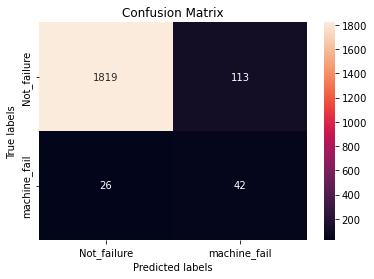

RF
 accuracy: 0.96
precision score: [0.99255319 0.45      ]
recall score: [0.96583851 0.79411765]
f1-score [0.97901364 0.57446809]


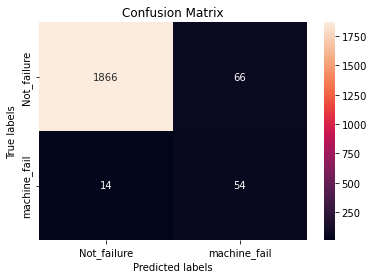

SVM-Linear
 accuracy: 0.8875
precision score: [0.9857712  0.17695473]
recall score: [0.89648033 0.63235294]
f1-score [0.93900786 0.27652733]


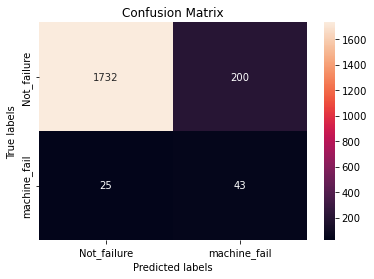

SVM-Non-Linear
 accuracy: 0.9425
precision score: [0.99134667 0.34437086]
recall score: [0.94875776 0.76470588]
f1-score [0.96958477 0.47488584]


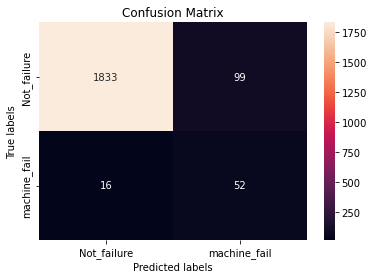

In [10]:
auc=[]
auc1=[]
rec=[]
rec1=[]
la=[]
names=[]
for name, model in classifiers.items():
    if(name=='SVM-Linear' or name=='SVM-Non-Linear'):
            model.fit(X_train_scaled2, y_train)
            true_labels=y_valid
            pred_labels= model.predict(X_valid_scaled2)
    else:
        model.fit(X_train, y_train)
        true_labels=y_valid
        pred_labels= model.predict(X_valid)
        

    names.append(name)
    la.append(name)
    rec.append(recall_score(true_labels, pred_labels,average=None)[0])
    rec1.append(recall_score(true_labels, pred_labels,average=None)[1])
    print(name)
    print( ' accuracy:', accuracy_score(true_labels, pred_labels))
    print('precision score:', precision_score(true_labels, pred_labels,average=None))
    print('recall score:', recall_score(true_labels, pred_labels,average=None))
    print('f1-score', f1_score(true_labels, pred_labels,average=None))
    cm = confusion_matrix(true_labels, pred_labels)
    #plt.figure(figsize=(3,3))
    ax = sns.heatmap(cm, annot=True, fmt='g')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not_failure','machine_fail']); 
    ax.yaxis.set_ticklabels(['Not_failure','machine_fail']);
    plt.show()
    #plt.close()
    #plot_label = "{} {:.3f}".format(name,auc)
    #plt.plot(auc,auc1, label=plot_label,kind='bar')

# CrosstabResult=pd.crosstab(index=auc,auc1,columns=df['Product'])
# print(CrosstabResult)
 
# # Grouped bar chart between GENDER and Product
# p1=CrosstabResult.plot.bar(figsize=(7,4), rot=0)
#     FPR, TPR, threshold = roc_curve(y_valid, y_valid_prob[:,1], pos_label=1)
#     auc = roc_auc_score(y_valid, y_valid_prob[:,1])
#     plot_label = "{} {:.3f}".format(name, auc)
#     plt.plot(FPR, TPR, label=plot_label)

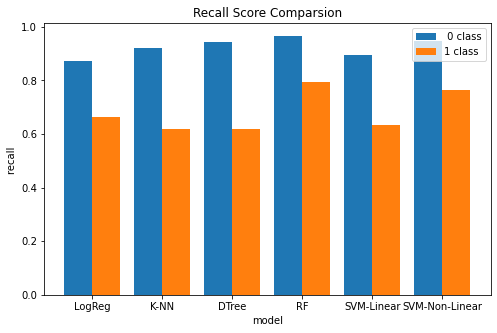

In [11]:
# #plt.bar(name,rec)
plt.figure(figsize=(8,5))
# plt.bar(names, rec, color ='maroon',
#         width = 0.2)
# plt.title('recall for failure class'); 
# plt.xlabel('classes'); 
# plt.ylabel('recall score TNR');
import matplotlib.pyplot as plt 
X_axis = np.arange(len(names))
  
plt.bar(X_axis - 0.2, rec, 0.4, label = ' 0 class')
plt.bar(X_axis + 0.2, rec1, 0.4, label = '1 class')
  
plt.xticks(X_axis, names)
plt.title('Recall Score Comparsion'); 
plt.xlabel('model'); 
plt.ylabel('recall ');
plt.legend()
plt.show()

In [12]:
model =  SVC(kernel= 'poly', gamma= 0.1, degree= 2, C= 5.0)
model.fit(X_train_scaled2, y_train)

SVC(C=5.0, degree=2, gamma=0.1, kernel='poly')

In [13]:
y_pred=model.predict(X_train_scaled2)
accuracy_score(y_train, y_pred)

0.9447127824736933

In [14]:
y_pred=model.predict(X_test_scaled2)
accuracy_score(y_test, y_pred)

0.9395

In [15]:
y_pred=model.predict(X_test_scaled2)
cm = confusion_matrix(y_test,y_pred)
cm

array([[1833,   99],
       [  22,   46]], dtype=int64)

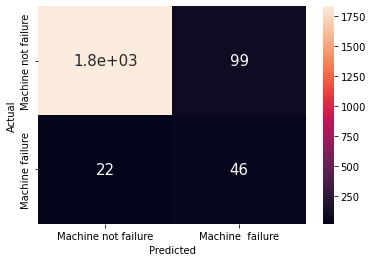

In [16]:
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":15},
           xticklabels=['Machine not failure', 'Machine  failure'],
           yticklabels=['Machine not failure', 'Machine failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [28]:
print(f"SVM Classification Report on Test data(wrapping method)")
cm=confusion_matrix(y_test, forest_y_pred)
print(classification_report(y_test,y_pred), "\n")

SVM Classification Report on Test data(wrapping method)
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1932
           1       0.32      0.68      0.43        68

    accuracy                           0.94      2000
   macro avg       0.65      0.81      0.70      2000
weighted avg       0.97      0.94      0.95      2000
 



In [18]:

m=['torque','air_temp','Type_M']
X_train3=X_train[m]
X_valid3=X_valid[m]
X_test3=X_test[m]
scaler = StandardScaler().fit(X_train3)
X_train_scaled3 = scaler.transform(X_train3)

X_valid_scaled3= scaler.transform(X_valid3)
X_test_scaled3 = scaler.transform(X_test3)

In [19]:
# from first variable seection method

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model.fit(X_train_scaled3, y_train)
forest_y_pred = model.predict(X_test_scaled3)
print(f"SVM Classification Report on Test data(LASSO feature selection)")
cm=confusion_matrix(y_test, forest_y_pred)
print(cm)
print(classification_report(y_test, forest_y_pred), "\n")

SVM Classification Report on Test data(LASSO feature selection)
[[1732  200]
 [  36   32]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1932
           1       0.14      0.47      0.21        68

    accuracy                           0.88      2000
   macro avg       0.56      0.68      0.57      2000
weighted avg       0.95      0.88      0.91      2000
 



In [26]:
f=[ "air_temp","process_temp","rot_speed","torque","tool_wear","Type_H","Type_L","Type_M"]
X_train3=X_train[m]
X_valid3=X_valid[m]
X_test3=X_test[m]
scaler = StandardScaler().fit(X_train3)
X_train_scaled3 = scaler.transform(X_train3)

X_valid_scaled3= scaler.transform(X_valid3)
X_test_scaled3 = scaler.transform(X_test3)

In [27]:
# from bidirectional wrapping 

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model.fit(X_train_scaled3, y_train)
forest_y_pred = model.predict(X_test_scaled3)
print(f"SVM Classification Report on Test data(wrapping method)")
cm=confusion_matrix(y_test, forest_y_pred)
print(cm)
print(classification_report(y_test, forest_y_pred), "\n")

SVM Classification Report on Test data(wrapping method)
[[1732  200]
 [  36   32]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1932
           1       0.14      0.47      0.21        68

    accuracy                           0.88      2000
   macro avg       0.56      0.68      0.57      2000
weighted avg       0.95      0.88      0.91      2000
 



In [22]:
### ROC AUC Curve for choosing the best model

In [23]:
# plt.figure(figsize = (8, 6))
# from sklearn.metrics import roc_curve, roc_auc_score
# for name, model in classifiers.items():
#     model.fit(X_train, y_train)
#     y_valid_prob = model.predict_proba(X_valid)
#     FPR, TPR, threshold = roc_curve(y_valid, y_valid_prob[:,1], pos_label=1)
#     auc = roc_auc_score(y_valid, y_valid_prob[:,1])
#     plot_label = "{} {:.3f}".format(name, auc)
#     plt.plot(FPR, TPR, label=plot_label)

# plt.xlabel('FPR', fontsize=15)
# plt.ylabel('TPR', fontsize=15)
# plt.title('Validation set: ROC curves and AUC', fontsize=15)
# plt.legend(loc='lower right', fontsize=15);

In [24]:
## Precision Recall curve for choosing the best model

In [25]:
# from sklearn.metrics import precision_recall_curve
# plt.figure(figsize = (8, 6))
# from sklearn.metrics import roc_curve, roc_auc_score
# for name, model in classifiers.items():
#     model.fit(X_train, y_train)
#     y_score = model.predict_proba(X_valid)[:, 1]
#     precision, recall, thresholds = precision_recall_curve(y_valid, y_score)
#   #  plot_label = "{} {:.3f}".format(name, recall)
#     plt.plot(recall, precision, label=name)

# plt.title('Precision-Recall Curve')
# plt.ylabel('Precision')
# plt.xlabel('Recall')
# plt.legend(loc='lower right', fontsize=15)
# plt.show()